# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [4]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-10-31 06:14:40--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.008s  

2023-10-31 06:14:40 (7.15 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [6]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,747,80,43,68,123,53,7,150,46,19,147,169,327,176,81,7,14,179,184
1,681,96,46,70,194,70,6,167,39,20,148,183,427,171,69,17,10,200,203
2,746,91,42,66,142,58,9,134,50,18,142,163,268,164,69,6,5,191,197
3,122,92,40,82,163,63,9,146,45,19,140,165,319,137,64,9,0,199,206
4,279,94,37,73,186,71,7,154,42,19,127,171,362,132,67,2,8,197,206
5,761,115,51,100,201,60,12,196,34,23,162,207,573,184,62,22,1,198,208
6,408,86,45,71,155,66,7,146,45,19,144,167,322,176,72,5,6,189,196
7,325,82,44,63,123,54,7,151,45,19,147,166,329,185,81,3,4,179,182
8,416,89,44,70,158,64,6,141,47,18,143,164,299,173,66,9,11,193,199
9,529,86,43,61,119,53,8,150,46,19,144,169,326,172,85,8,8,179,182


Methods `describe` and `info` deliver some useful information.

In [233]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.238616,93.963570,45.076503,82.817851,169.943534,61.648452,8.768670,170.123862,40.675774,20.690346,148.539162,189.863388,446.346084,176.089253,72.457195,6.245902,12.845173,188.808743,195.646630
std,242.961615,8.306544,6.163938,16.027451,34.308743,8.201294,4.951521,33.541063,7.826621,2.624060,14.354633,31.974863,178.958668,32.807351,7.936132,4.851030,9.058996,6.019572,7.492021
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,208.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,167.000000,319.000000,151.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,415.000000,93.000000,45.000000,81.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,71.000000,5.000000,11.000000,188.000000,197.000000
75%,629.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,219.000000,602.000000,200.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [234]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

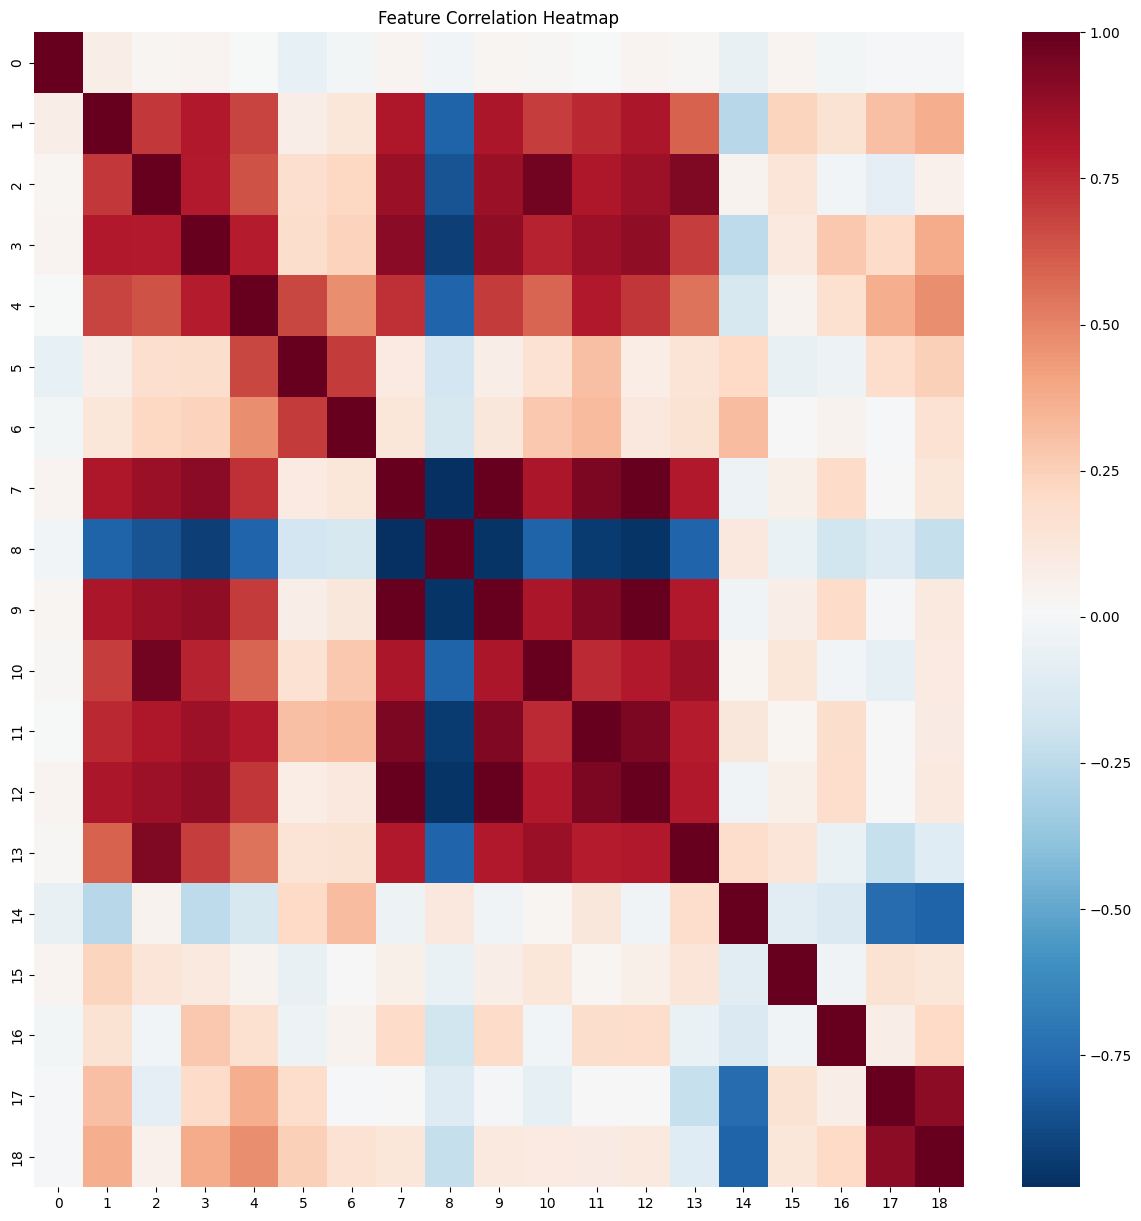

[2, 7, 8, 9]


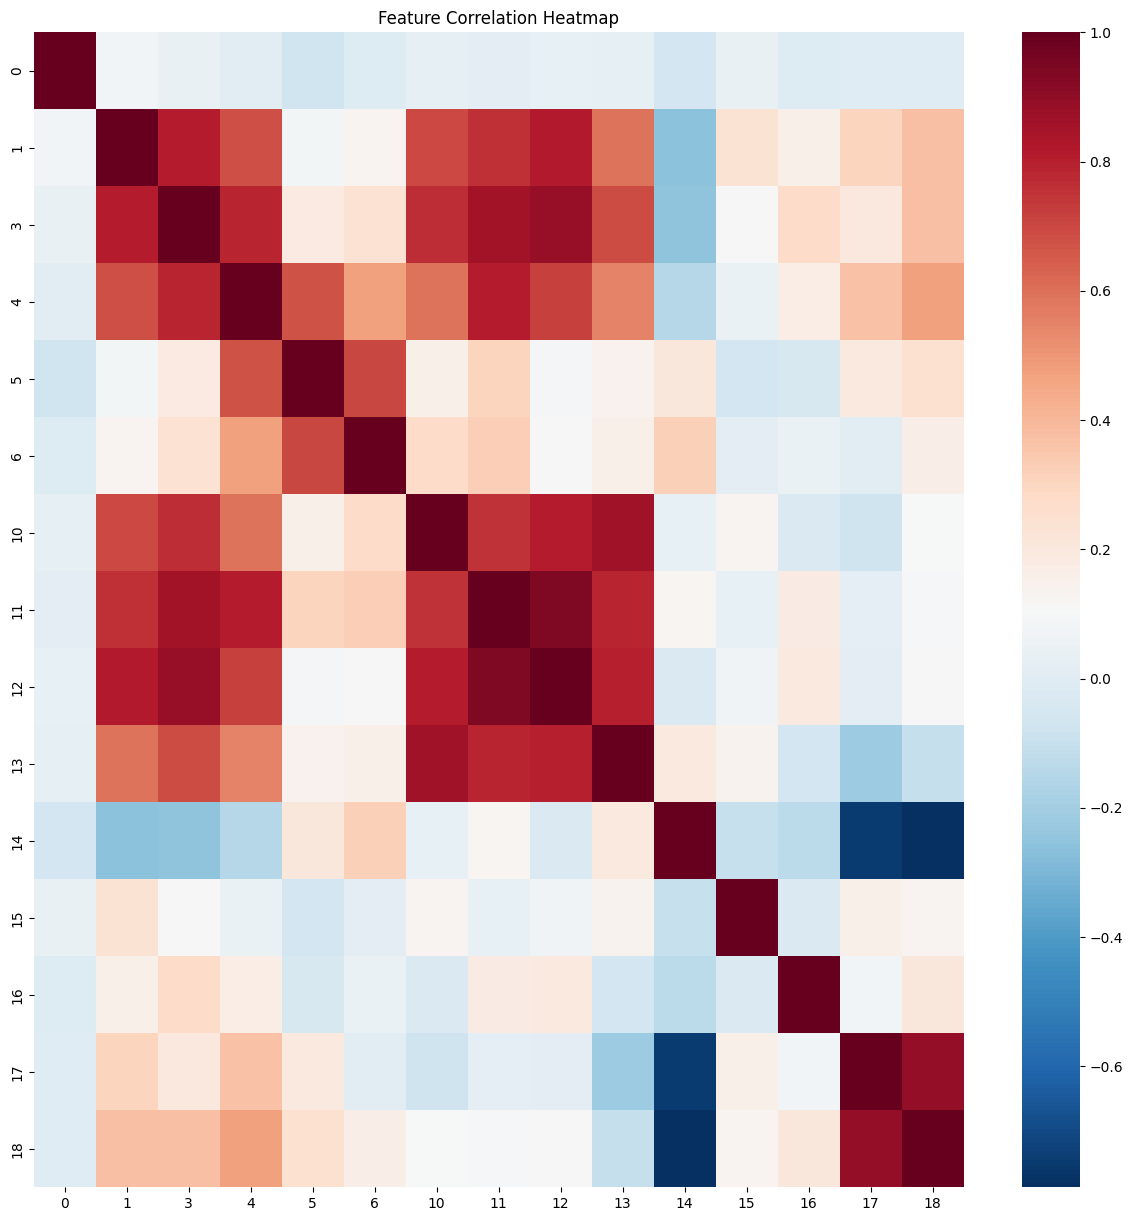

In [244]:
### YOUR CODE HERE
# Explanation: The data can be normalized by subtracting the mean (µ) of each
#feature and a division by the standard deviation (σ). This way, each feature
#has a mean of 0 and a standard deviation of 1. This results in faster convergence.

from sklearn.preprocessing import normalize, StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


def show_heatmap(data):
  plt.figure(figsize=(15, 15))
  pearson_corr = data.corr(method='pearson')
  sns.heatmap(pearson_corr, annot=False, cmap='RdBu_r')
  plt.title("Feature Correlation Heatmap", fontsize=12)
  plt.show()

X_train_decorr = X_train_pd
show_heatmap(X_train_decorr)
corr_df = X_train_decorr.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
columns_to_drop = [c for c in tri_df.columns if any (tri_df[c] > 0.95)]
print(columns_to_drop)
# columns_to_drop = []

# columns_to_drop = [2,8,14,7,9, 11,17,12] 38
# columns_to_drop = [8]
X_train_decorr = X_train_decorr.drop(columns_to_drop, axis=1)
show_heatmap(X_train_decorr)


# X_train_norm = normalize(X_train_decorr, axis=0, norm='max')

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_decorr)
X_train_norm_pd = pd.DataFrame(X_train_norm)




#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [245]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train_norm, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7905087572977482


In [246]:

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

X_test_pd = pd.DataFrame(X_test)
x_test_dropped = X_test_pd.drop(columns_to_drop, axis=1)
x_test_norm = scaler.transform(x_test_dropped)
y_pred = logreg_cv.predict(x_test_norm)
print(y_pred)
print(y_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

postive = f1_score(y_test, y_pred, average=None)
print(postive)

negative = f1_score(y_test, y_pred, average=None)
print(negative)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


['bus' 'van' 'saab' 'bus' 'opel' 'saab' 'van' 'opel' 'van' 'bus' 'van'
 'opel' 'bus' 'opel' 'saab' 'opel' 'opel' 'opel' 'saab' 'bus' 'van' 'van'
 'opel' 'van' 'opel' 'van' 'saab' 'van' 'bus' 'van' 'van' 'saab' 'opel'
 'opel' 'opel' 'saab' 'opel' 'opel' 'bus' 'saab' 'van' 'saab' 'bus' 'van'
 'saab' 'opel' 'opel' 'van' 'bus' 'saab' 'saab' 'opel' 'bus' 'opel' 'saab'
 'van' 'bus' 'opel' 'bus' 'saab' 'saab' 'van' 'saab' 'bus' 'opel' 'bus'
 'saab' 'van' 'opel' 'van' 'bus' 'opel' 'van' 'opel' 'bus' 'saab' 'opel'
 'saab' 'bus' 'bus' 'bus' 'van' 'van' 'saab' 'van' 'opel' 'saab' 'bus'
 'van' 'opel' 'van' 'opel' 'opel' 'opel' 'opel' 'van' 'bus' 'saab' 'bus'
 'opel' 'opel' 'saab' 'van' 'van' 'opel' 'saab' 'van' 'bus' 'bus' 'saab'
 'bus' 'saab' 'opel' 'van' 'opel' 'van' 'opel' 'van' 'saab' 'bus' 'opel'
 'opel' 'saab' 'bus' 'bus' 'bus' 'van' 'saab' 'bus' 'opel' 'bus' 'bus'
 'bus' 'van' 'van' 'opel' 'van' 'bus' 'saab' 'opel' 'saab' 'bus' 'saab'
 'bus' 'opel' 'bus' 'saab' 'bus' 'saab' 'saab' 'bus' 'va

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

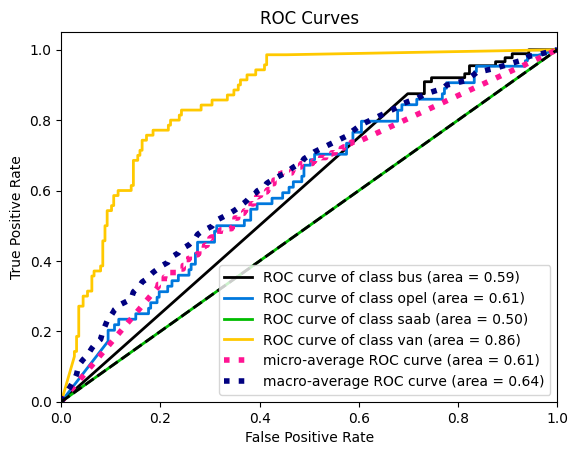

In [242]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc


# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(x_test_dropped)#[:, 1]
plot_roc(y_test, y_pred_prob)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

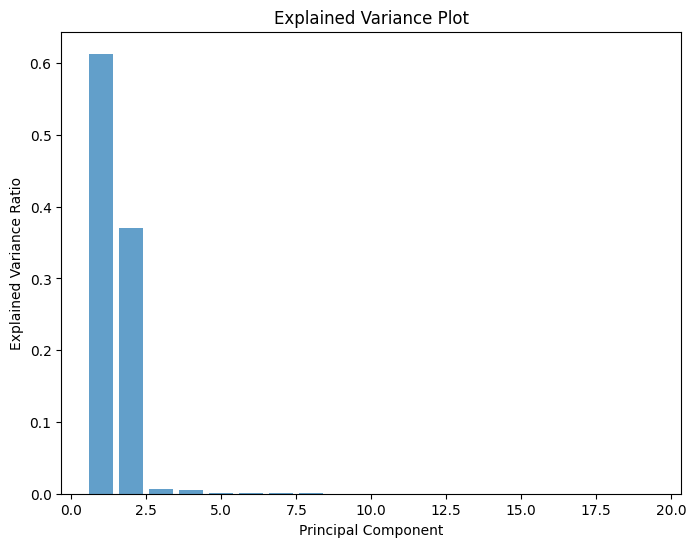

In [276]:
### YOUR CODE HERE

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate and fit a PCA model
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Create an explained variance plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Plot')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [315]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# # Calculate cumulative explained variance
# cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# # Find the number of components for 95% variance
# # n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
# # print(f"Number of components for 95% variance: {n_components}")

n_components = 18

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

pca2 = PCA(n_components=n_components)
X_train_pca = pca2.fit_transform(X_train_normalized)
X_test_pca = pca2.transform(X_test_normalized)



**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/l

Best Hyperparameters: {'classifier__C': 0.1, 'classifier__max_iter': 500}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


F1 Score: [0.83615819 0.58914729 0.58208955 0.8961039 ]
Accuracy: 0.7407407407407407


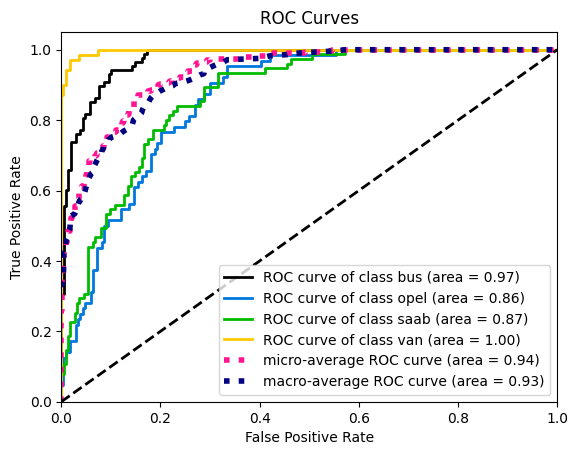

In [314]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Create a Logistic Regression classifier with specified hyperparameters
logistic_classifier = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)

# Create a pipeline to chain PCA and Logistic Regression
pipeline = Pipeline(steps=[('pca', pca2), ('classifier', logistic_classifier)])

# Find optimal hyperparameters using cross-validation
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__max_iter': [500]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model with the best hyperparameters on the training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

# Calculate F1 score and accuracy
f1 = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_moons

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Define a range of max_depth values to search
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Perform a grid search for the optimal max_depth using cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best max_depth from the grid search
best_max_depth = grid_search.best_params_['max_depth']

# Train a Decision Tree with the best max_depth on the entire training data
best_dt = DecisionTreeClassifier(max_depth=best_max_depth)
best_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_dt.predict(X_test)

# Calculate and print accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)

print(f"Optimal Max Depth: {best_max_depth}")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Decision Tree F1 Score: {f1}")


Optimal Max Depth: 9
Decision Tree Accuracy: 0.72
Decision Tree F1 Score: [0.94366197 0.55263158 0.56962025 0.83098592]


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

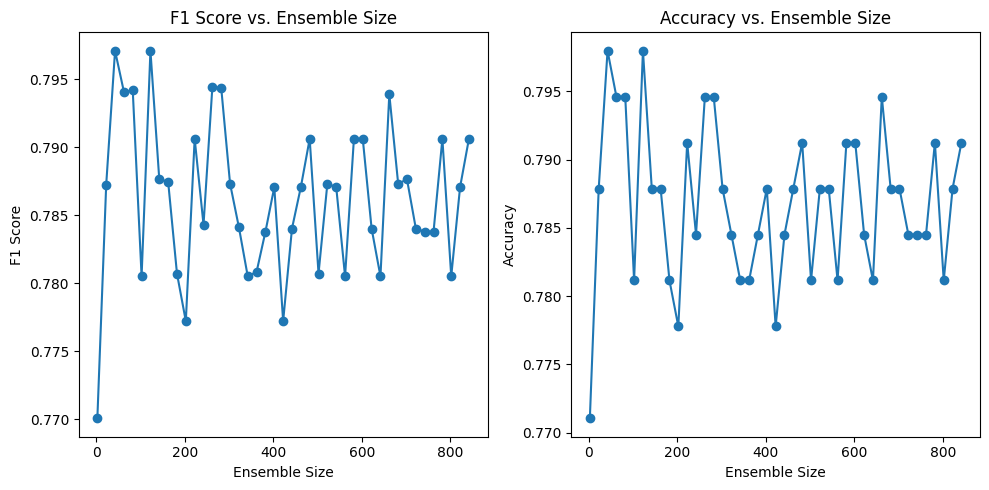

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Define a range of ensemble sizes from 2 to 846 with a step of 20
ensemble_sizes = np.arange(2, 846, 100)

# Lists to store F1 and accuracy scores
f1_scores = []
accuracy_scores = []

# Train Bagging ensemble with logistic regressions for different ensemble sizes
for n in ensemble_sizes:
    ensemble = BaggingClassifier(estimator=LogisticRegression(solver='liblinear'), n_estimators=n)
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Plot F1 and accuracy scores w.r.t. the size of the ensemble
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores, marker='o')
plt.title('F1 Score vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores, marker='o')
plt.title('Accuracy vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


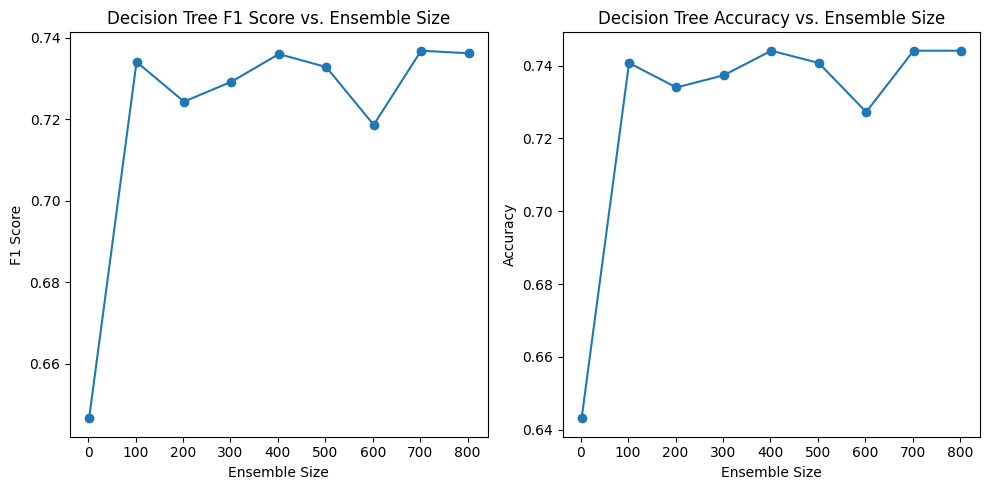

In [19]:

# Use the best_max_depth found in the previous section
dt = DecisionTreeClassifier(max_depth=best_max_depth)

# Lists to store F1 and accuracy scores for decision tree ensembles
dt_f1_scores = []
dt_accuracy_scores = []
ensemble_sizes = np.arange(2, 846, 100)

# Train Bagging ensemble with decision trees for different ensemble sizes
for n in ensemble_sizes:
    ensemble = BaggingClassifier(estimator=dt, n_estimators=n)
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    dt_f1_scores.append(f1)
    dt_accuracy_scores.append(accuracy)

# Plot F1 and accuracy scores for decision tree ensemble
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, dt_f1_scores, marker='o')
plt.title('Decision Tree F1 Score vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, dt_accuracy_scores, marker='o')
plt.title('Decision Tree Accuracy vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

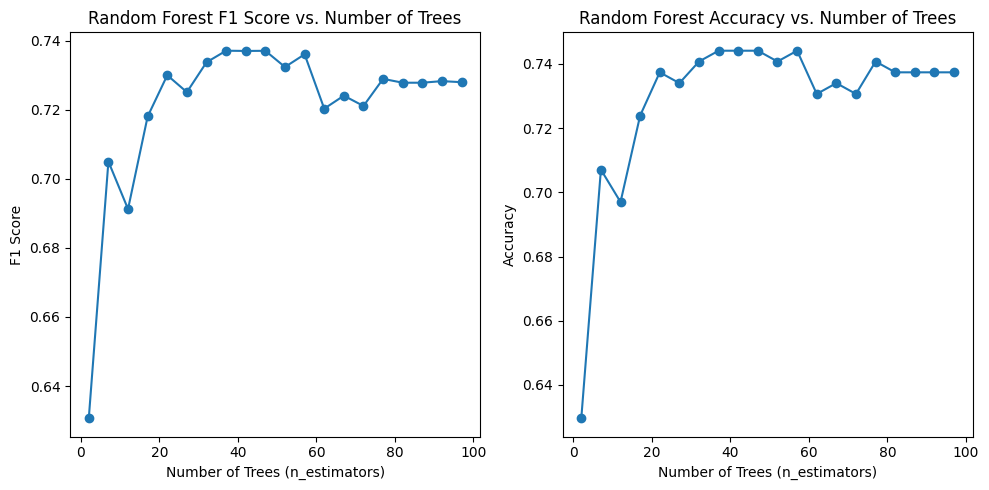

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Lists to store F1 and accuracy scores for Random Forest
rf_f1_scores = []
rf_accuracy_scores = []

# Define a range of n_estimators (number of trees) values
n_estimators_range = np.arange(2, 101, 5)

# Train Random Forest for different number of trees
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, max_depth=best_max_depth, random_state=42)  # Use the best_max_depth found in section 2.5
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    rf_f1_scores.append(f1)
    rf_accuracy_scores.append(accuracy)

# Plot F1 and accuracy scores w.r.t. the number of trees in Random Forest
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, rf_f1_scores, marker='o')
plt.title('Random Forest F1 Score vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('F1 Score')

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, rf_accuracy_scores, marker='o')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

[ 54 109 164 219 274 329 384 439 494 549]


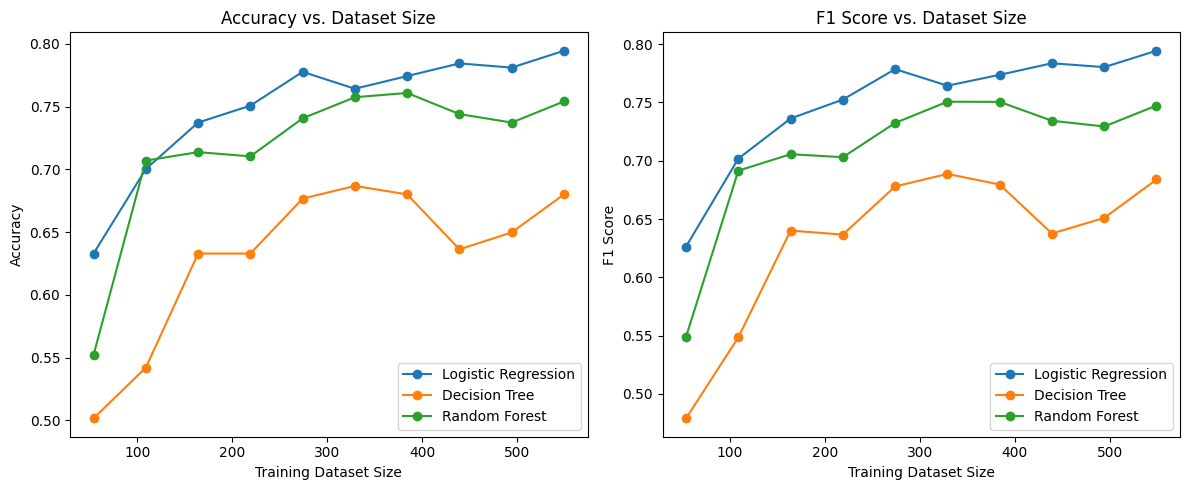

In [29]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define a range of training dataset sizes (1 part, 2 parts, ..., 10 parts)
train_sizes = np.arange(1, 11) * len(X_train) // 10
print(train_sizes)
# Lists to store accuracy and F1 scores
lr_accuracies, lr_f1_scores = [], []
dt_accuracies, dt_f1_scores = [], []
rf_accuracies, rf_f1_scores = [], []

# Choosen with data from plots above
best_n_estimators=40

for size in train_sizes:
    if size == 549:
      X_train_subset, y_train_subset= X_train, y_train
    else:
      X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    # Train Logistic Regression
    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train_subset, y_train_subset)
    y_pred = lr.predict(X_test)
    lr_accuracies.append(accuracy_score(y_test, y_pred))
    lr_f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    # Train Decision Tree
    dt = DecisionTreeClassifier(max_depth=best_max_depth)  # Use the best_max_depth found in section 2.5
    dt.fit(X_train_subset, y_train_subset)
    y_pred = dt.predict(X_test)
    dt_accuracies.append(accuracy_score(y_test, y_pred))
    dt_f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)  # Use the best_n_estimators and best_max_depth found
    rf.fit(X_train_subset, y_train_subset)
    y_pred = rf.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, y_pred))
    rf_f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Plot accuracy and F1 scores on the test part vs. dataset size
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, lr_accuracies, marker='o', label='Logistic Regression')
plt.plot(train_sizes, dt_accuracies, marker='o', label='Decision Tree')
plt.plot(train_sizes, rf_accuracies, marker='o', label='Random Forest')
plt.title('Accuracy vs. Dataset Size')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, lr_f1_scores, marker='o', label='Logistic Regression')
plt.plot(train_sizes, dt_f1_scores, marker='o', label='Decision Tree')
plt.plot(train_sizes, rf_f1_scores, marker='o', label='Random Forest')
plt.title('F1 Score vs. Dataset Size')
plt.xlabel('Training Dataset Size')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [34]:

import xgboost as xgb
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a range of n_estimators (number of decision trees) values to search:

n_estimators_range = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800]

# Perform a grid search to find the optimal number of decision trees:
best_n_estimators = None
best_accuracy = 0.0

rename_dict = {'bus':0, 'opel': 1, 'saab': 2, 'van': 3}

y_train_norm = list(map(lambda x: rename_dict[x], y_train))
y_test_norm = list(map(lambda x: rename_dict[x], y_test))

for n_estimators in n_estimators_range:
    model = xgb.XGBClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train_norm)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_norm, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Optimal number of decision trees: {best_n_estimators}")


0.7306397306397306 10
0.734006734006734 50
0.7306397306397306 100
0.7407407407407407 200
0.7508417508417509 300
0.7542087542087542 400
0.7508417508417509 500
0.7508417508417509 600
0.7508417508417509 700
0.7508417508417509 800
Optimal number of decision trees: 400
